##Data Prepocessing and EDA


###Download Libraries


In [1]:
pip install pandas matplotlib scikit-learn google.colab datetime seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 17.2 MB/s eta 0:00:00


### Import Packages

In [2]:
import pandas
from google.colab import drive
from datetime import datetime
import seaborn
import matplotlib.pyplot as plt


###Data Deprocessing


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
count    3.817700e+04
mean     2.431342e+06
std      1.863026e+07
min      1.004000e+04
25%      5.250000e+05
50%      7.600000e+05
75%      1.280000e+06
max      2.155000e+09
Name: sale_price, dtype: float64


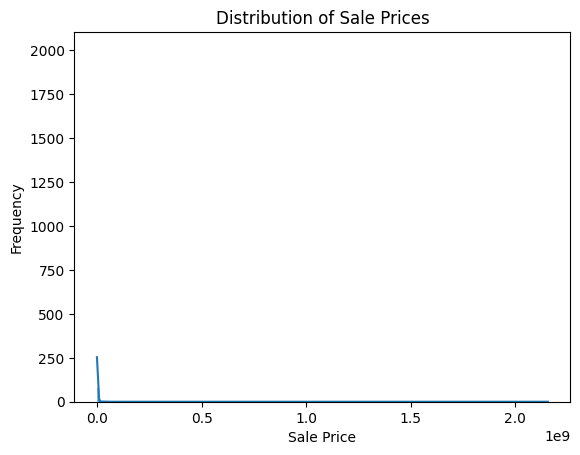

In [5]:
drive.mount('/content/drive')

file_path='/content/drive/My Drive/NYC_property_sales.csv'
df=pandas.read_csv(file_path)
df.drop(['building_class_category', 'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
         'apartment_number', 'total_units', 'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
         'sale_date'], axis=1, inplace=True )
df['year_built'] = datetime.now().year - df['year_built']
df.rename(columns={'year_built': 'property_age'}, inplace=True)



df.to_csv('/content/drive/My Drive/modified_NYC_property_sales.csv', index=False)

###EDA

count    3.817700e+04
mean     2.431342e+06
std      1.863026e+07
min      1.004000e+04
25%      5.250000e+05
50%      7.600000e+05
75%      1.280000e+06
max      2.155000e+09
Name: sale_price, dtype: float64


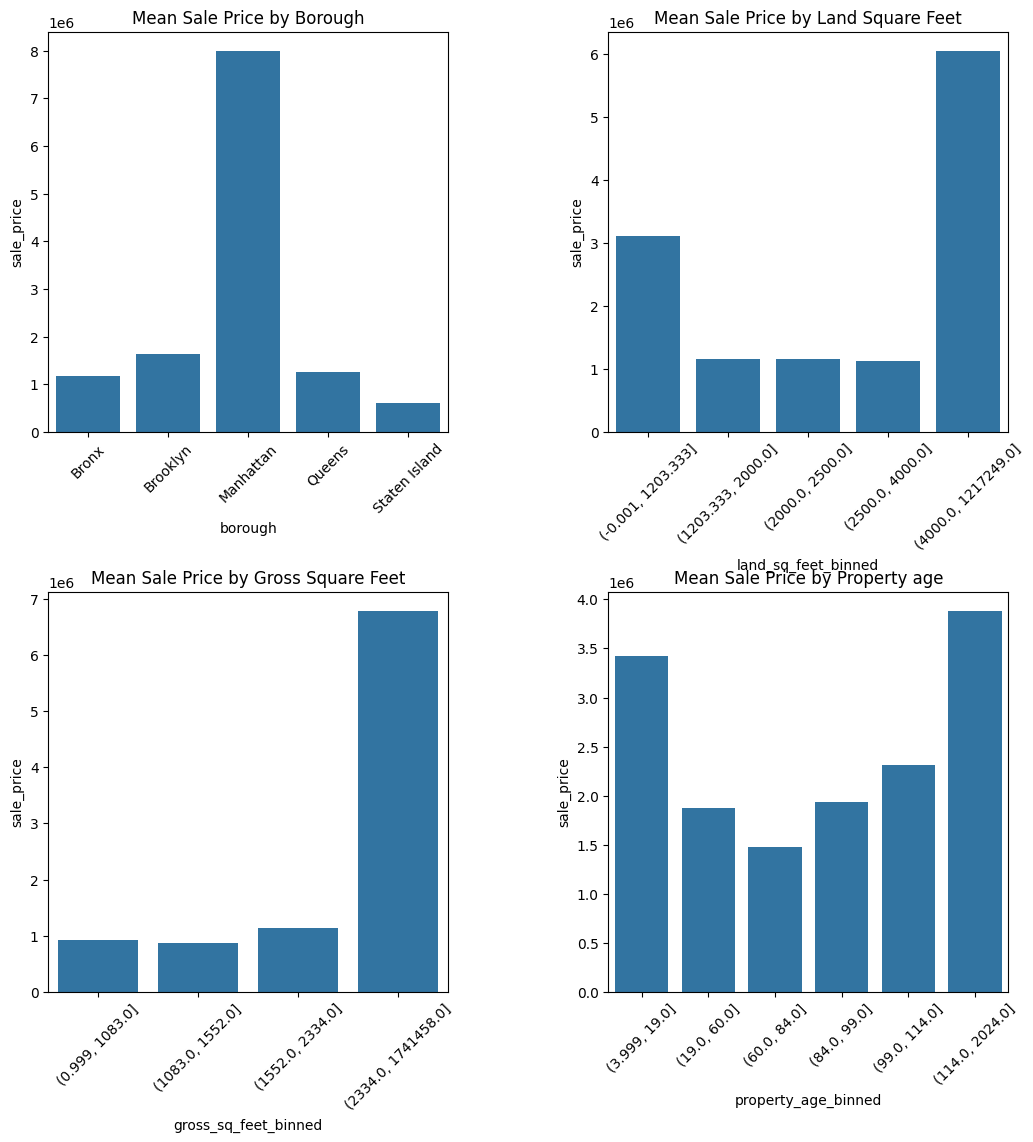

In [19]:
print(df['sale_price'].describe())
mean_price_borough = df.groupby('borough')['sale_price'].mean().reset_index()
df['land_sq_feet_binned'] = pandas.qcut(df['land_square_feet'], q=6, duplicates='drop')
mean_price_land = df.groupby('land_sq_feet_binned')['sale_price'].mean().reset_index()
df['gross_sq_feet_binned'] = pandas.qcut(df['gross_square_feet'], q=4, duplicates='drop')
mean_price_gross = df.groupby('gross_sq_feet_binned')['sale_price'].mean().reset_index()
df['property_age_binned'] = pandas.qcut(df['property_age'], q=6, duplicates='drop')
mean_property_age = df.groupby('property_age_binned')['sale_price'].mean().reset_index()

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
seaborn.barplot(x='borough', y='sale_price', data=mean_price_borough)
plt.title('Mean Sale Price by Borough')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
seaborn.barplot(x='land_sq_feet_binned', y='sale_price', data=mean_price_land)
plt.title('Mean Sale Price by Land Square Feet')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
seaborn.barplot(x='gross_sq_feet_binned', y='sale_price', data=mean_price_gross)
plt.title('Mean Sale Price by Gross Square Feet')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
seaborn.barplot(x='property_age_binned', y='sale_price', data=mean_property_age)
plt.title('Mean Sale Price by Property age')
plt.xticks(rotation=45)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)
plt.show()
